# Identify Customer Segments

There are four files associated with this project:

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep = ';')
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep = ';')

In [3]:
display(azdias.head(n=10))

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3,1,2,2.0,3,1,5,2,2,5,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,-1,2,2,5.0,1,5,1,5,4,3,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,-1,1,1,3.0,3,3,4,1,3,2,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,-1,3,1,3.0,4,4,2,4,2,2,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,-1,3,2,4.0,2,4,2,3,5,4,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [4]:
print('Number of rows:', azdias.shape[0])
print('Number of columns', azdias.shape[1])

Number of rows: 891221
Number of columns 85


In [5]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


## Preprocessing

#### Convert Missing Value Codes to NaNs

In [6]:
columns_dict = feat_info[['attribute','missing_or_unknown']].to_dict()
attributes = columns_dict['attribute']
missing_or_unknown = columns_dict['missing_or_unknown']

In [7]:
def is_int(s):
    return s.isdigit() or s.startswith('-') and s[1:].isdigit()
    
attribute_to_missing_values = {}
for i, attribute in attributes.items():
    raw_codes = missing_or_unknown[i][1:-1].split(',')
    func = lambda x: int(x) if is_int(x) else x
    codes = list(map(func, raw_codes))
    attribute_to_missing_values[attribute] = codes


In [8]:
for attribute, codes in attribute_to_missing_values.items():
    azdias[attribute] = azdias[attribute].transform(lambda x: np.NaN if x in codes else x)

#### Assess Missing Data in Each Column


In [9]:
attibute_to_count_of_nans = {}
for attribute in attribute_to_missing_values:
    attibute_to_count_of_nans[attribute] = azdias[attribute].isnull().sum()

In [10]:
count_nans = [(y, x) for x, y in attibute_to_count_of_nans.items()]
count_nans.sort(reverse = True)

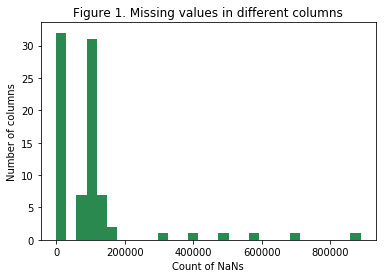

In [11]:
counts = [x for x, y in count_nans]

plt.hist(counts, bins = 30, color = '#29894E' )
plt.title('Figure 1. Missing values in different columns')
plt.xlabel('Count of NaNs')
plt.ylabel('Number of columns')


plt.show()

In [12]:
features_to_drop = ['TITEL_KZ', 'AGER_TYP', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBURTSJAHR', 'ALTER_HH']
azdias_clean = azdias.drop(features_to_drop, axis = 1)

#### Review of handling missing data in each column

- The list of codes provided in the feature overview was heterogene i.e. some codes were numbers (-1, 1, 0, 9) some were instead non numeric (like 'X', 'XX'). Creating a dictionary which maps the names of the feature columns and the corresponding codes, it became possible to iterate through the demographics data and replace all the missing values (both with numeric and non-numeric codes) with NaN

- Iterated through the demographics data and calculated the sum of NaNs per column, created a list with tuples where the first value corresponded to the actual number of NaNs and the second one standed for the feature name. The list of tuples was then sorted in a descending order. 

- After plottting the hisotogram of the NaNs distribution in the data set, it became clear that there are some outliers, which were then droped. These were six columns with more than a third of values (~ 300k) being a NaN.


#### Assess Missing Data in Each Row

In [ ]:
row_nans = azdias_clean.isnull().sum(axis=1)

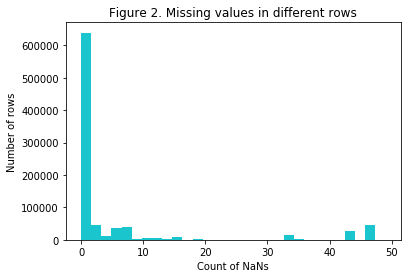

In [15]:
plt.hist(row_nans, bins = 30, color='#1AC5CD' )
plt.title('Figure 2. Missing values in different rows')
plt.xlabel('Count of NaNs')
plt.ylabel('Number of rows')


plt.show()

In [16]:
threshold_nans = 10
azdias_clean_rows = azdias_clean.iloc[row_nans[row_nans < threshold_nans].index]
azdias_clean_rows_too_many_nans = azdias_clean.iloc[row_nans[row_nans >= threshold_nans].index]

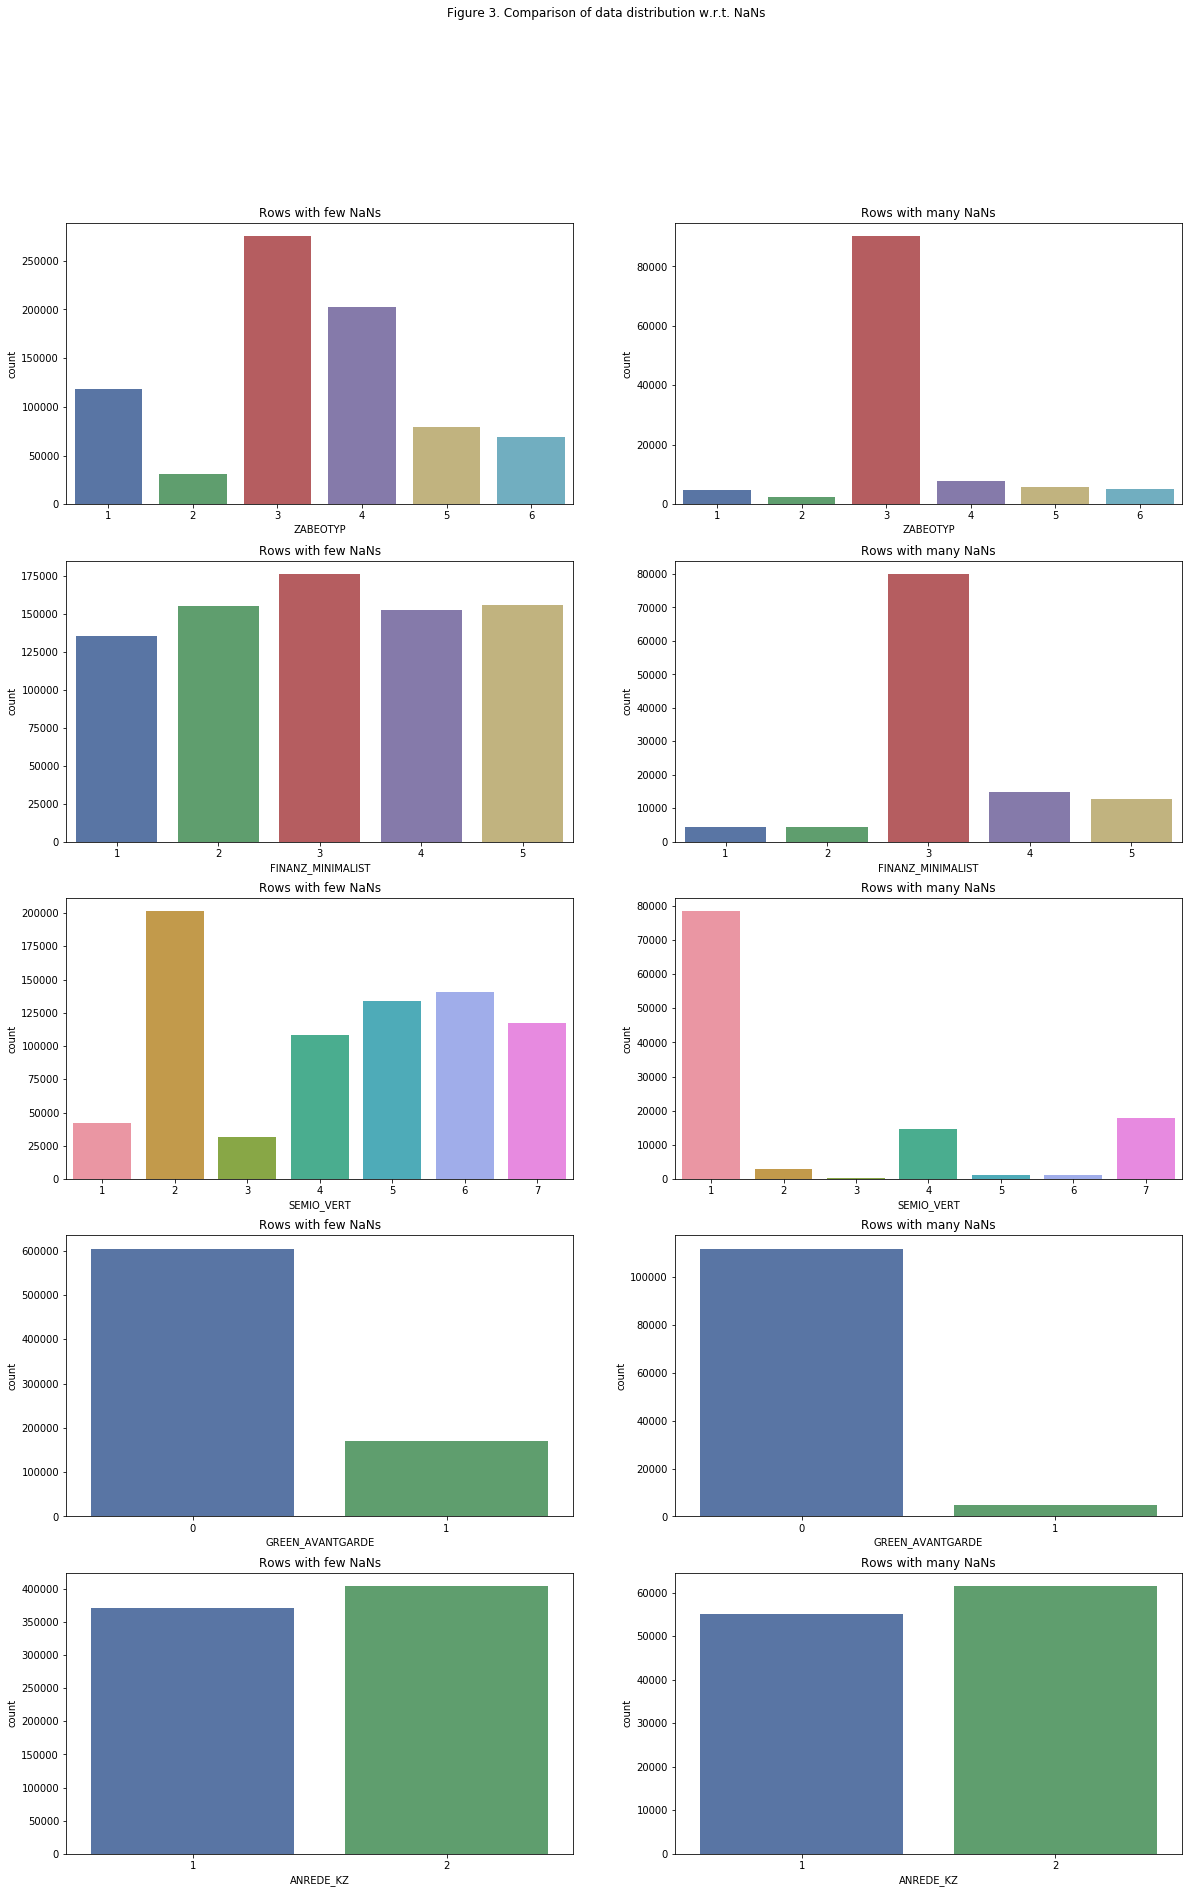

In [17]:
columns_to_compare = ['ZABEOTYP', 'FINANZ_MINIMALIST', 'SEMIO_VERT', 'GREEN_AVANTGARDE', 'ANREDE_KZ' ]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20,30))
fig.suptitle('Figure 3. Comparison of data distribution w.r.t. NaNs')
count_of_figs =0
sns.set(style="white")
for column in columns_to_compare:
    sns.countplot(azdias_clean_rows[column], ax=axes[count_of_figs,0])
    axes[count_of_figs,0].set_title('Rows with few NaNs')
    sns.countplot(azdias_clean_rows_too_many_nans[column], ax=axes[count_of_figs,1])
    axes[count_of_figs,1].set_title('Rows with many NaNs')
    count_of_figs +=1 

#### Review of handling missing data in each row

- The same procedure was followed as with the columns. First, the total number of NaNs per each row was found out.
- After plotting the distribution of the missing data in the rows, a reasonable threshold (10) was chosen. This corresponds to the number of NaNs in each row.
- Afterwards, the rows with less NaNs than the threshold were filtered and merged into one dataframe and the rest into another. 
- Plotting a selection of data distributions of 5 columns with the least number of missing values showed that there are both colomnus where the presence of NaNs does not essentially influence the distribution of data and there are also columns which strongly vary depending on whether there are NaNs.

### Select and Re-Encode Features

In [18]:
feat_info.groupby(['type']).count()['attribute']

type
categorical    21
interval        1
mixed           7
numeric         7
ordinal        49
Name: attribute, dtype: int64

#### Re-Encode Categorical Features

In [19]:
categorical_attributes = feat_info[feat_info['type'] == 'categorical']['attribute']

for feature in features_to_drop:
    mask = categorical_attributes == feature
    if mask.any():
        index_to_drop = categorical_attributes[mask].index[0]
        print("Drop attribute %s" % feature)
        categorical_attributes.drop(labels=index_to_drop, inplace=True)

categorical_attributes

Drop attribute TITEL_KZ
Drop attribute AGER_TYP
Drop attribute KK_KUNDENTYP


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(obj)


2            ANREDE_KZ
3        CJT_GESAMTTYP
10           FINANZTYP
12     GFK_URLAUBERTYP
13    GREEN_AVANTGARDE
17     LP_FAMILIE_FEIN
18     LP_FAMILIE_GROB
19      LP_STATUS_FEIN
20      LP_STATUS_GROB
21    NATIONALITAET_KZ
38         SHOPPER_TYP
39             SOHO_KZ
41            VERS_TYP
42            ZABEOTYP
52         GEBAEUDETYP
55         OST_WEST_KZ
57     CAMEO_DEUG_2015
58      CAMEO_DEU_2015
Name: attribute, dtype: object

In [20]:
azdias_categorical_attributes = azdias_clean_rows[categorical_attributes]

In [21]:
binary_attributes = []
multi_class_attributes = []
for attribute in categorical_attributes:
    attribute_column = azdias_categorical_attributes[attribute]
    grouped = attribute_column.groupby(attribute_column).count()
    number_of_classes = grouped.count()
    if number_of_classes == 2:
        binary_attributes.append(attribute)
    else:
        multi_class_attributes.append(attribute)
    print("%s: %d" % (attribute, number_of_classes))

ANREDE_KZ: 2
CJT_GESAMTTYP: 6
FINANZTYP: 6
GFK_URLAUBERTYP: 12
GREEN_AVANTGARDE: 2
LP_FAMILIE_FEIN: 11
LP_FAMILIE_GROB: 5
LP_STATUS_FEIN: 10
LP_STATUS_GROB: 5
NATIONALITAET_KZ: 3
SHOPPER_TYP: 4
SOHO_KZ: 2
VERS_TYP: 2
ZABEOTYP: 6
GEBAEUDETYP: 7
OST_WEST_KZ: 2
CAMEO_DEUG_2015: 9
CAMEO_DEU_2015: 44


In [22]:
print("Binary attrbiutes:", binary_attributes)
print("Multi class attrbiutes:", multi_class_attributes)

Binary attrbiutes: ['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']
Multi class attrbiutes: ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


In [23]:
azdias_categorical_attributes[binary_attributes].dtypes

ANREDE_KZ             int64
GREEN_AVANTGARDE      int64
SOHO_KZ             float64
VERS_TYP            float64
OST_WEST_KZ          object
dtype: object

In [24]:
ost_west_kz = azdias_categorical_attributes['OST_WEST_KZ']
ost_west_kz.groupby(by=ost_west_kz).count()

OST_WEST_KZ
O    164485
W    610258
Name: OST_WEST_KZ, dtype: int64

In [25]:
azdias_categorical_attributes[multi_class_attributes].dtypes

CJT_GESAMTTYP       float64
FINANZTYP             int64
GFK_URLAUBERTYP     float64
LP_FAMILIE_FEIN     float64
LP_FAMILIE_GROB     float64
LP_STATUS_FEIN      float64
LP_STATUS_GROB      float64
NATIONALITAET_KZ    float64
SHOPPER_TYP         float64
ZABEOTYP              int64
GEBAEUDETYP         float64
CAMEO_DEUG_2015      object
CAMEO_DEU_2015       object
dtype: object

In [26]:
cameo_deug_2015 = azdias_categorical_attributes['CAMEO_DEUG_2015']
cameo_deug_2015.groupby(by=cameo_deug_2015).count()

CAMEO_DEUG_2015
1     35374
2     80537
3     82660
4    100587
5     53026
6    103635
7     76265
8    132563
9    106640
Name: CAMEO_DEUG_2015, dtype: int64

In [27]:
cameo_deu_2015 = azdias_categorical_attributes['CAMEO_DEU_2015']
cameo_deu_2015.groupby(by=cameo_deu_2015).count()

CAMEO_DEU_2015
1A    10571
1B     3970
1C     4188
1D    11699
1E     4946
2A    12795
2B    14906
2C    18731
2D    34105
3A     8698
3B     6668
3C    33893
3D    33401
4A    31990
4B     8745
4C    46283
4D     8383
4E     5186
5A    11074
5B    10087
5C     9571
5D    14594
5E     3517
5F     4183
6A     6647
6B    55429
6C    14502
6D     5956
6E    15838
6F     5263
7A    33648
7B    23954
7C     8920
7D     5234
7E     4509
8A    51807
8B    32828
8C    30591
8D    17337
9A    20258
9B    27359
9C    24705
9D    28215
9E     6103
Name: CAMEO_DEU_2015, dtype: int64

In [28]:
azdias_clean_rows['OST_WEST_KZ'] = azdias_clean_rows['OST_WEST_KZ'].transform(lambda x: 1 if x == 'W' else 0)
azdias_clean_rows['CAMEO_DEUG_2015'] = azdias_clean_rows['CAMEO_DEUG_2015'].transform(lambda x: int(x) if x is not np.NaN else x)
azdias_clean_rows = azdias_clean_rows.drop(['CAMEO_DEU_2015'], axis = 1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Review of re-encoding categorical features

- Found all categorical features and split them into two groups - binary and multi-class
- Among binary features found one 'OST_WEST_KZ' which is not numerically represented, and converted it into 1-0 values
- Among multi-class features found one that was non-numeric, but was convertable to integeres - converted it; another one that was non-numeric and non-convertable - dropped it

#### Engineer Mixed-Type Features

In [29]:
decade = {1: 0, 2: 0, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2, 8: 3, 9: 3, 10: 4, 11: 4, 12: 4, 13: 4, 14: 5, 15: 5}
movement = {1: 0, 3: 0, 5: 0, 8: 0, 10: 0, 12: 0, 14: 0, 2: 1, 4: 1, 6: 1, 7: 1, 9: 1, 11: 1, 13: 1, 15: 1}

def convert_decade(x):
    try:
        return decade[int(x)]
    except ValueError:
        return np.NaN

def convert_movement(x):
    try:
        return movement[int(x)]
    except ValueError:
        return np.NaN

azdias_clean_rows['DECADE'] = azdias_clean_rows['PRAEGENDE_JUGENDJAHRE'].transform(lambda x: convert_decade(x))
azdias_clean_rows['MOVEMENT'] = azdias_clean_rows['PRAEGENDE_JUGENDJAHRE'].transform(lambda x: convert_movement(x))

In [30]:
display(azdias_clean_rows[['PRAEGENDE_JUGENDJAHRE', 'DECADE', 'MOVEMENT']].head(n=10))

,PRAEGENDE_JUGENDJAHRE,DECADE,MOVEMENT
1,14.0,5.0,0.0
2,15.0,5.0,1.0
3,8.0,3.0,0.0
4,8.0,3.0,0.0
5,3.0,1.0,0.0
6,10.0,4.0,0.0
7,8.0,3.0,0.0
8,11.0,4.0,1.0
9,15.0,5.0,1.0
10,3.0,1.0,0.0


In [31]:
azdias_clean_rows = azdias_clean_rows.drop(['PRAEGENDE_JUGENDJAHRE'], axis = 1)

In [32]:
def convert_wealth(x):
    try:
        return int(x) // 10
    except ValueError:
        return np.NaN

def convert_life_stage(x):
    try:
        return int(x) % 10
    except ValueError:
        return np.NaN

azdias_clean_rows['WEALTH'] = azdias_clean_rows['CAMEO_INTL_2015'].transform(lambda x: convert_wealth(x))
azdias_clean_rows['LIFE_STAGE'] = azdias_clean_rows['CAMEO_INTL_2015'].transform(lambda x: convert_life_stage(x))

In [33]:
display(azdias_clean_rows[['CAMEO_INTL_2015', 'WEALTH', 'LIFE_STAGE']].head(n=10))

,CAMEO_INTL_2015,WEALTH,LIFE_STAGE
1,51,5.0,1.0
2,24,2.0,4.0
3,12,1.0,2.0
4,43,4.0,3.0
5,54,5.0,4.0
6,22,2.0,2.0
7,14,1.0,4.0
8,13,1.0,3.0
9,15,1.0,5.0
10,51,5.0,1.0


In [34]:
azdias_clean_rows = azdias_clean_rows.drop(['CAMEO_INTL_2015'], axis = 1)

In [35]:
mixed_featues = feat_info[feat_info['type'] == 'mixed']['attribute']
mixed_featues

15      LP_LEBENSPHASE_FEIN
16      LP_LEBENSPHASE_GROB
22    PRAEGENDE_JUGENDJAHRE
56                 WOHNLAGE
59          CAMEO_INTL_2015
64             KBA05_BAUMAX
79              PLZ8_BAUMAX
Name: attribute, dtype: object

In [36]:
azdias_clean_rows = azdias_clean_rows.drop(['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'WOHNLAGE', 'PLZ8_BAUMAX'], axis = 1)

#### Review of engineering mixed-type features

- Converted PRAEGENDE_JUGENDJAHRE feature to 2 new features DECADE and MOVEMENT, by mapping each value to a value in accordance to the Data_Dictionary.md
- Converted CAMEO_INTL_2015 feature to 2 new features WEALTH and LIFE_STAGE in the same fashion
- Dropped PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015 features remaining the new ones
- Dropped all other mixed features

#### Complete Feature Selection

In [37]:
azdias_clean_rows.dtypes.groupby(by=azdias_clean_rows.dtypes).count()

int64      25
float64    51
dtype: int64

In [38]:
display(azdias_clean_rows.head(n=10))

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
1,1.0,2,5.0,1,5,2,5,4,5,1,...,1.0,5.0,4.0,3.0,5.0,4.0,5.0,0.0,5.0,1.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,0.0,4.0,4.0,3.0,5.0,2.0,5.0,1.0,2.0,4.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,0.0,3.0,4.0,2.0,3.0,3.0,3.0,0.0,1.0,2.0
4,3.0,1,5.0,4,3,4,1,3,2,5,...,1.0,3.0,3.0,4.0,6.0,5.0,3.0,0.0,4.0,3.0
5,1.0,2,2.0,3,1,5,2,2,5,2,...,1.0,5.0,5.0,2.0,3.0,3.0,1.0,0.0,5.0,4.0
6,2.0,2,5.0,1,5,1,5,4,3,4,...,0.0,5.0,5.0,4.0,6.0,3.0,4.0,0.0,2.0,2.0
7,1.0,1,3.0,3,3,4,1,3,2,5,...,0.0,4.0,4.0,2.0,5.0,2.0,3.0,0.0,1.0,4.0
8,3.0,1,3.0,4,4,2,4,2,2,6,...,1.0,3.0,3.0,2.0,4.0,3.0,4.0,1.0,1.0,3.0
9,3.0,2,4.0,2,4,2,3,5,4,1,...,1.0,3.0,3.0,2.0,3.0,1.0,5.0,1.0,1.0,5.0
10,3.0,2,1.0,2,2,5,3,1,5,6,...,0.0,3.0,3.0,4.0,6.0,5.0,1.0,0.0,5.0,1.0


### Create a Cleaning Function

In [39]:
def clean_data(df):
    """
    Perform feature trimming and re-encoding for demographics
    data.
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """

    for attribute, codes in attribute_to_missing_values.items():
        df[attribute] = df[attribute].transform(lambda x: np.NaN if x in codes else x)

    df = df.drop(features_to_drop, axis = 1)

    df['OST_WEST_KZ'] = df['OST_WEST_KZ'].transform(lambda x: 1 if x == 'W' else 0)
    df['CAMEO_DEUG_2015'] = df['CAMEO_DEUG_2015'].transform(lambda x: int(x) if x is not np.NaN else x)
    df = df.drop(['CAMEO_DEU_2015'], axis = 1)
    
    df['DECADE'] = df['PRAEGENDE_JUGENDJAHRE'].transform(lambda x: convert_decade(x))
    df['MOVEMENT'] = df['PRAEGENDE_JUGENDJAHRE'].transform(lambda x: convert_movement(x))
    df = df.drop(['PRAEGENDE_JUGENDJAHRE'], axis = 1)
    
    df['WEALTH'] = df['CAMEO_INTL_2015'].transform(lambda x: convert_wealth(x))
    df['LIFE_STAGE'] = df['CAMEO_INTL_2015'].transform(lambda x: convert_life_stage(x))
    df = df.drop(['CAMEO_INTL_2015'], axis = 1)
    
    df = df.drop(['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'WOHNLAGE', 'PLZ8_BAUMAX'], axis = 1)

    return df


##  Feature Transformation

###  Apply Feature Scaling


In [40]:
row_nans = azdias_clean_rows.isnull().sum(axis=1)
print(row_nans.shape[0])
print(row_nans[row_nans > 0].shape[0])

774743
151532


In [41]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='most_frequent')
azdias_imputed = imputer.fit_transform(azdias_clean_rows)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
azdias_scaled = scaler.fit_transform(azdias_imputed)

###  Review of applying feature scaling

- Counted how many rows still have NaNs
- Used Imputer to replace all NaN values with the most frequent value from the feature, because there were many ordinal or categorical features apart from numeric features
- Used StandardScaler to standardize values

###  Perform Dimensionality Reduction


In [43]:
from sklearn.decomposition import PCA

pca = PCA()
features_pca = pca.fit_transform(azdias_scaled)

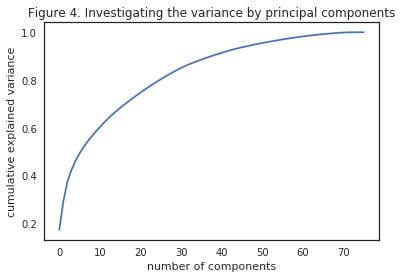

In [44]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.title('Figure 4. Investigating the variance by principal components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.show()

In [45]:
pca = PCA(50)
features_pca_50 = pca.fit_transform(azdias_scaled)

### Review of performing dimensionality reduction

-  Applying PCA on the imputed and scaled data set showed that the a very high varience can be preserved while reducing the nuber of components down to 50. 
-  PCA was then reapplied using the evaluated number of components. 

###  Interpret Principal Components

In [46]:
def weights_of_features(pca, component_number):
    feature_to_weights = {}
    for index, feature in enumerate(azdias_clean_rows.columns):
        feature_to_weights[feature] = pca.components_[component_number][index]
    return dict([(k, v) for v, k in sorted([(v, k) for k, v in feature_to_weights.items()], reverse=True)])

In [47]:
weights_of_features(pca, 1)

{'ALTERSKATEGORIE_GROB': 0.25939753937246379,
 'FINANZ_VORSORGER': 0.23174866690546653,
 'SEMIO_ERL': 0.22339159670690256,
 'SEMIO_LUST': 0.17954425448099473,
 'RETOURTYP_BK_S': 0.16259614849378101,
 'W_KEIT_KIND_HH': 0.11841286243140904,
 'FINANZTYP': 0.1120483886474222,
 'SEMIO_KRIT': 0.10850106174268227,
 'SHOPPER_TYP': 0.10499991933277615,
 'FINANZ_HAUSBAUER': 0.10110119683994302,
 'SEMIO_KAEM': 0.097906943693436291,
 'FINANZ_MINIMALIST': 0.08078486826193669,
 'ANREDE_KZ': 0.078311777857372866,
 'PLZ8_ANTG3': 0.076213142591627467,
 'EWDICHTE': 0.07317884732738765,
 'ORTSGR_KLS9': 0.072073878515668807,
 'PLZ8_ANTG4': 0.071823375871766931,
 'WEALTH': 0.06330465890383373,
 'SEMIO_DOM': 0.059547342653883367,
 'KBA05_ANTG4': 0.059091248487121023,
 'CAMEO_DEUG_2015': 0.058613672685231502,
 'WOHNDAUER_2008': 0.057492593861366952,
 'ARBEIT': 0.05633910238433433,
 'RELAT_AB': 0.052911707686123501,
 'ANZ_HAUSHALTE_AKTIV': 0.052281180025645968,
 'PLZ8_ANTG2': 0.052199449518434346,
 'HH_EINKOM

In [48]:
weights_of_features(pca, 2)

{'SEMIO_VERT': 0.33762714196779275,
 'SEMIO_SOZ': 0.26085791581444256,
 'SEMIO_FAM': 0.2546752213434052,
 'SEMIO_KULT': 0.24028164605677432,
 'FINANZ_MINIMALIST': 0.14582303557110241,
 'FINANZTYP': 0.11475198186534799,
 'RETOURTYP_BK_S': 0.10199998130568945,
 'FINANZ_VORSORGER': 0.085280506227942449,
 'W_KEIT_KIND_HH': 0.085084396922731773,
 'SEMIO_REL': 0.083647387505312767,
 'SEMIO_MAT': 0.064194008921996518,
 'ALTERSKATEGORIE_GROB': 0.062224766828140855,
 'PLZ8_ANTG3': 0.051532682040507635,
 'PLZ8_ANTG4': 0.051411203057067367,
 'ORTSGR_KLS9': 0.051040005095764014,
 'SEMIO_LUST': 0.050780757909296287,
 'EWDICHTE': 0.04942761123847824,
 'MOVEMENT': 0.041968601579961164,
 'GREEN_AVANTGARDE': 0.04196860157996115,
 'ARBEIT': 0.040616189481974201,
 'CAMEO_DEUG_2015': 0.036787427864113972,
 'WEALTH': 0.036551213590809442,
 'RELAT_AB': 0.035054427485204903,
 'PLZ8_ANTG2': 0.033765092106688967,
 'LP_STATUS_GROB': 0.031102776571694662,
 'KBA05_ANTG4': 0.030787307472130647,
 'ANZ_HAUSHALTE_AKT

In [49]:
weights_of_features(pca, 3)

{'MOVEMENT': 0.32559354506687388,
 'GREEN_AVANTGARDE': 0.32559354506687388,
 'EWDICHTE': 0.26986758831887092,
 'ORTSGR_KLS9': 0.26498355178837035,
 'LP_FAMILIE_GROB': 0.22036848337349091,
 'LP_FAMILIE_FEIN': 0.21891669009454479,
 'ANZ_PERSONEN': 0.20661368682617587,
 'ONLINE_AFFINITAET': 0.16623869208070774,
 'PLZ8_ANTG3': 0.14384927603951994,
 'PLZ8_ANTG4': 0.13541565578391984,
 'RELAT_AB': 0.12604170689972677,
 'LP_STATUS_GROB': 0.12600029667940429,
 'PLZ8_ANTG2': 0.11520750996657354,
 'SEMIO_DOM': 0.10366399704875941,
 'ARBEIT': 0.09872245361153581,
 'LP_STATUS_FEIN': 0.097908671655968449,
 'SEMIO_KAEM': 0.08699340243381351,
 'PLZ8_HHZ': 0.085307002855549555,
 'CJT_GESAMTTYP': 0.079667495371042951,
 'SHOPPER_TYP': 0.061486359598871623,
 'OST_WEST_KZ': 0.05139977496966068,
 'FINANZ_UNAUFFAELLIGER': 0.05001463364141432,
 'FINANZ_MINIMALIST': 0.048981208406102539,
 'ANZ_TITEL': 0.043341108900013317,
 'WOHNDAUER_2008': 0.042831115057488635,
 'SEMIO_RAT': 0.040869486292933035,
 'ANZ_HH_T

###  Review of interpreting principal components

- Examining the weights of different features as seen per component showed that there is a correlation between negative and positive weights. 
- In the case of the first component 3 features with the most positive weights ('ALTERSKATEGORIE_GROB',
 'FINANZ_VORSORGER', 'SEMIO_ERL') were all from the same group of features ('Person-level features') according to the Data Dictionary. Wheares 'FINANZ_SPARER', 'DECADE' and 'SEMIO_REL' showed the most negative weights in this component. 
- Similar trends can be observed in the rest of the few first investigated components. For instance, in the third component 'GREEN_AVANTGARDE','MOVEMENT' and 'EWDICHTE' were weighted most positively while 'HH_EINKOMMEN_SCORE', 'BALLRAUM' and 'INNENSTADT' appeared to have the most negative weights. 
- All together this indicates, that different components tend to cover different groups of features, having a correlation represented through the sign of the weights.

##  Clustering

### Apply Clustering to General Population

In [50]:
from sklearn.cluster import KMeans

features_pca_50_subset = features_pca_50[np.random.choice(features_pca_50.shape[0], int(features_pca_50.shape[0]*0.1), replace=False)]
 
scores = [] 

for k in np.arange(5, 31):
    kmeans = KMeans(k, random_state=2019, max_iter=30)
    kmeans.fit(features_pca_50_subset)
    score = np.abs(kmeans.score(features_pca_50_subset))
    scores.append(score)
    print('KMeans with k = %d got score %f' % (k, score))    

KMeans with k = 5 got score 4117890.001807
KMeans with k = 6 got score 3989947.683624
KMeans with k = 7 got score 3872968.928190
KMeans with k = 8 got score 3782675.591860
KMeans with k = 9 got score 3719922.027979
KMeans with k = 10 got score 3661603.497235
KMeans with k = 11 got score 3589411.513419
KMeans with k = 12 got score 3550186.965560
KMeans with k = 13 got score 3530895.204183
KMeans with k = 14 got score 3478978.597335
KMeans with k = 15 got score 3443197.098204
KMeans with k = 16 got score 3420213.345791
KMeans with k = 17 got score 3378435.543742
KMeans with k = 18 got score 3367433.565896
KMeans with k = 19 got score 3341686.020358
KMeans with k = 20 got score 3282257.421313
KMeans with k = 21 got score 3266439.907782
KMeans with k = 22 got score 3272006.962646
KMeans with k = 23 got score 3238264.908923
KMeans with k = 24 got score 3213167.082044
KMeans with k = 25 got score 3194915.343614
KMeans with k = 26 got score 3172144.105032
KMeans with k = 27 got score 3132242.

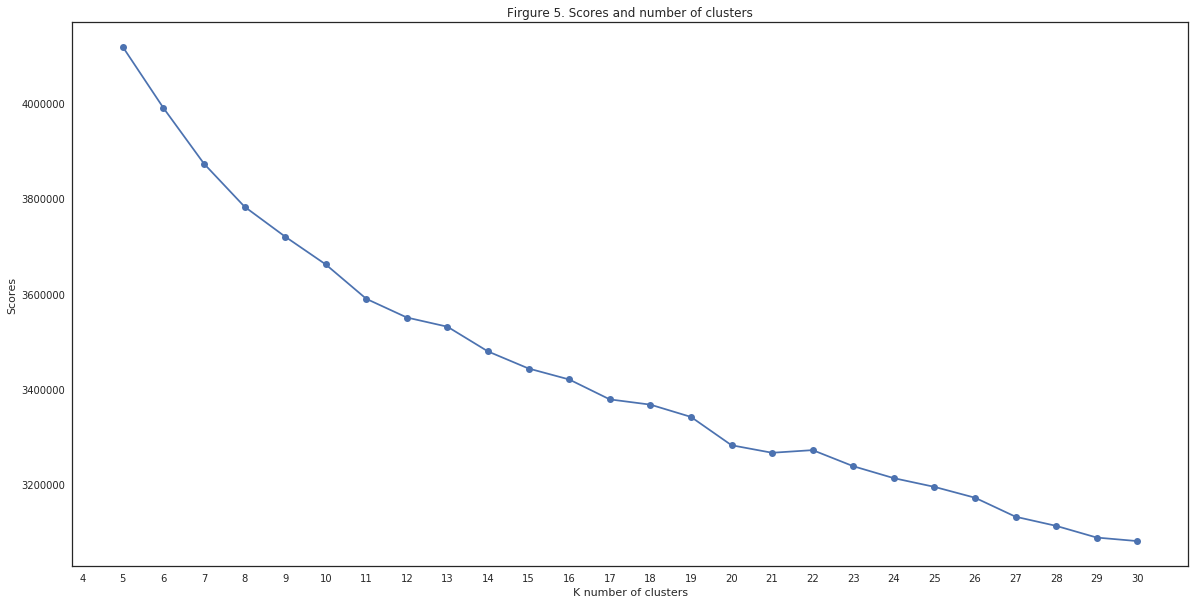

In [51]:
plt.figure(figsize=(20, 10))
plt.xticks(np.arange(0, 31))
plt.xlabel('K number of clusters')
plt.ylabel('Scores')
plt.title('Firgure 5. Scores and number of clusters')
plt.plot(np.arange(5, 31), scores, linestyle='-', marker='o');

In [52]:
k = 19
kmeans = KMeans(k, random_state= 2019, max_iter=30).fit(features_pca_50)
predicted_clusters = kmeans.predict(features_pca_50)

### Review of applying clustering to general population

- While making a decision on the reasonable number of clusters, a subset from the original dataset was taken randomely and corresponded to 10% of the original number of records. 
- Kmeans was then applied on this reduced dataset, iterating on different number of clusters, starting from 5 up to 30 clusters. 
- After plotting the value of the score corresponding to each number of k, an almost linear dependancy on number of clusters and the performance of the algorithm could be observed. 
- However, at the k of around 19 the graph seems to start decreasing slower, hence this number of k was chosen to be tested on the whole data set.

### Apply All Steps to the Customer Data

In [53]:
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep = ';')

In [54]:
customers_cleaned = clean_data(customers)

customers_imputed = imputer.transform(customers_cleaned)

customers_scaled = scaler.transform(customers_imputed)

customers_pca_50 = pca.transform(customers_scaled)

customers_predicted = kmeans.predict(customers_pca_50)

###  Compare Customer Data to Demographics Data

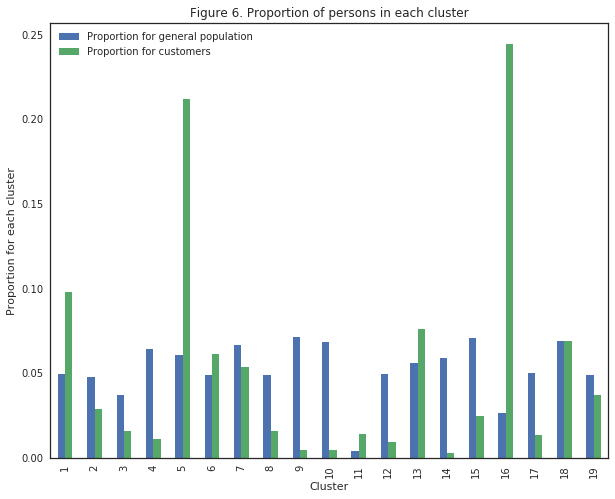

In [55]:
proportion_general = []
proportion_customer = []
x = [i+1 for i in range(19)]
for i in range(19):
    proportion_general.append((predicted_clusters == i).sum()/len(predicted_clusters))
    proportion_customer.append((customers_predicted == i).sum()/len(customers_predicted))


overall_data_frame = pd.DataFrame({'Cluster' : x, 'Proportion for general population' : proportion_general, 'Proportion for customers':proportion_customer})

overall_data_frame.plot(x='Cluster', y = ['Proportion for general population', 'Proportion for customers'], kind='bar', figsize=(10,8))
plt.title('Figure 6. Proportion of persons in each cluster')
plt.ylabel('Proportion for each cluster')
plt.show()


In [56]:
cluster_16 = scaler.inverse_transform(pca.inverse_transform(customers_pca_50[np.where(customers_predicted==16)])).round()
cluster_info_16 = pd.DataFrame(data=cluster_16,
          index=np.array(range(0, cluster_16.shape[0])),
          columns=azdias_clean_rows.columns)

cluster_info_16.head(5)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
0,3.0,2.0,4.0,3.0,1.0,5.0,1.0,1.0,4.0,4.0,...,2.0,3.0,2.0,4.0,8.0,4.0,2.0,0.0,5.0,1.0
1,4.0,2.0,5.0,2.0,2.0,4.0,3.0,2.0,3.0,6.0,...,1.0,3.0,3.0,4.0,7.0,5.0,3.0,0.0,5.0,4.0
2,4.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,5.0,3.0,...,2.0,4.0,2.0,4.0,8.0,3.0,2.0,-0.0,4.0,1.0
3,3.0,2.0,5.0,2.0,1.0,5.0,1.0,2.0,4.0,4.0,...,3.0,4.0,2.0,3.0,9.0,5.0,2.0,0.0,4.0,1.0
4,3.0,2.0,6.0,1.0,4.0,2.0,4.0,4.0,4.0,1.0,...,0.0,4.0,4.0,4.0,7.0,5.0,5.0,0.0,4.0,3.0


In [57]:
cluster_9 = scaler.inverse_transform(pca.inverse_transform(customers_pca_50[np.where(customers_predicted==9)])).round()
cluster_info_9 = pd.DataFrame(data=cluster_9,
          index=np.array(range(0, cluster_9.shape[0])),
          columns=azdias_clean_rows.columns)

cluster_info_9.head(5)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
0,2.0,1.0,4.0,2.0,4.0,3.0,3.0,4.0,3.0,2.0,...,2.0,3.0,1.0,3.0,8.0,5.0,5.0,-0.0,4.0,1.0
1,2.0,1.0,5.0,3.0,3.0,4.0,1.0,3.0,3.0,6.0,...,0.0,3.0,3.0,4.0,8.0,4.0,3.0,1.0,4.0,5.0
2,2.0,1.0,3.0,2.0,5.0,1.0,4.0,3.0,4.0,6.0,...,2.0,5.0,2.0,4.0,9.0,3.0,5.0,0.0,4.0,1.0
3,2.0,1.0,6.0,4.0,2.0,3.0,1.0,2.0,3.0,4.0,...,1.0,4.0,3.0,4.0,8.0,3.0,3.0,0.0,4.0,5.0
4,1.0,1.0,5.0,2.0,5.0,2.0,3.0,5.0,3.0,4.0,...,1.0,3.0,2.0,3.0,6.0,5.0,5.0,1.0,5.0,4.0


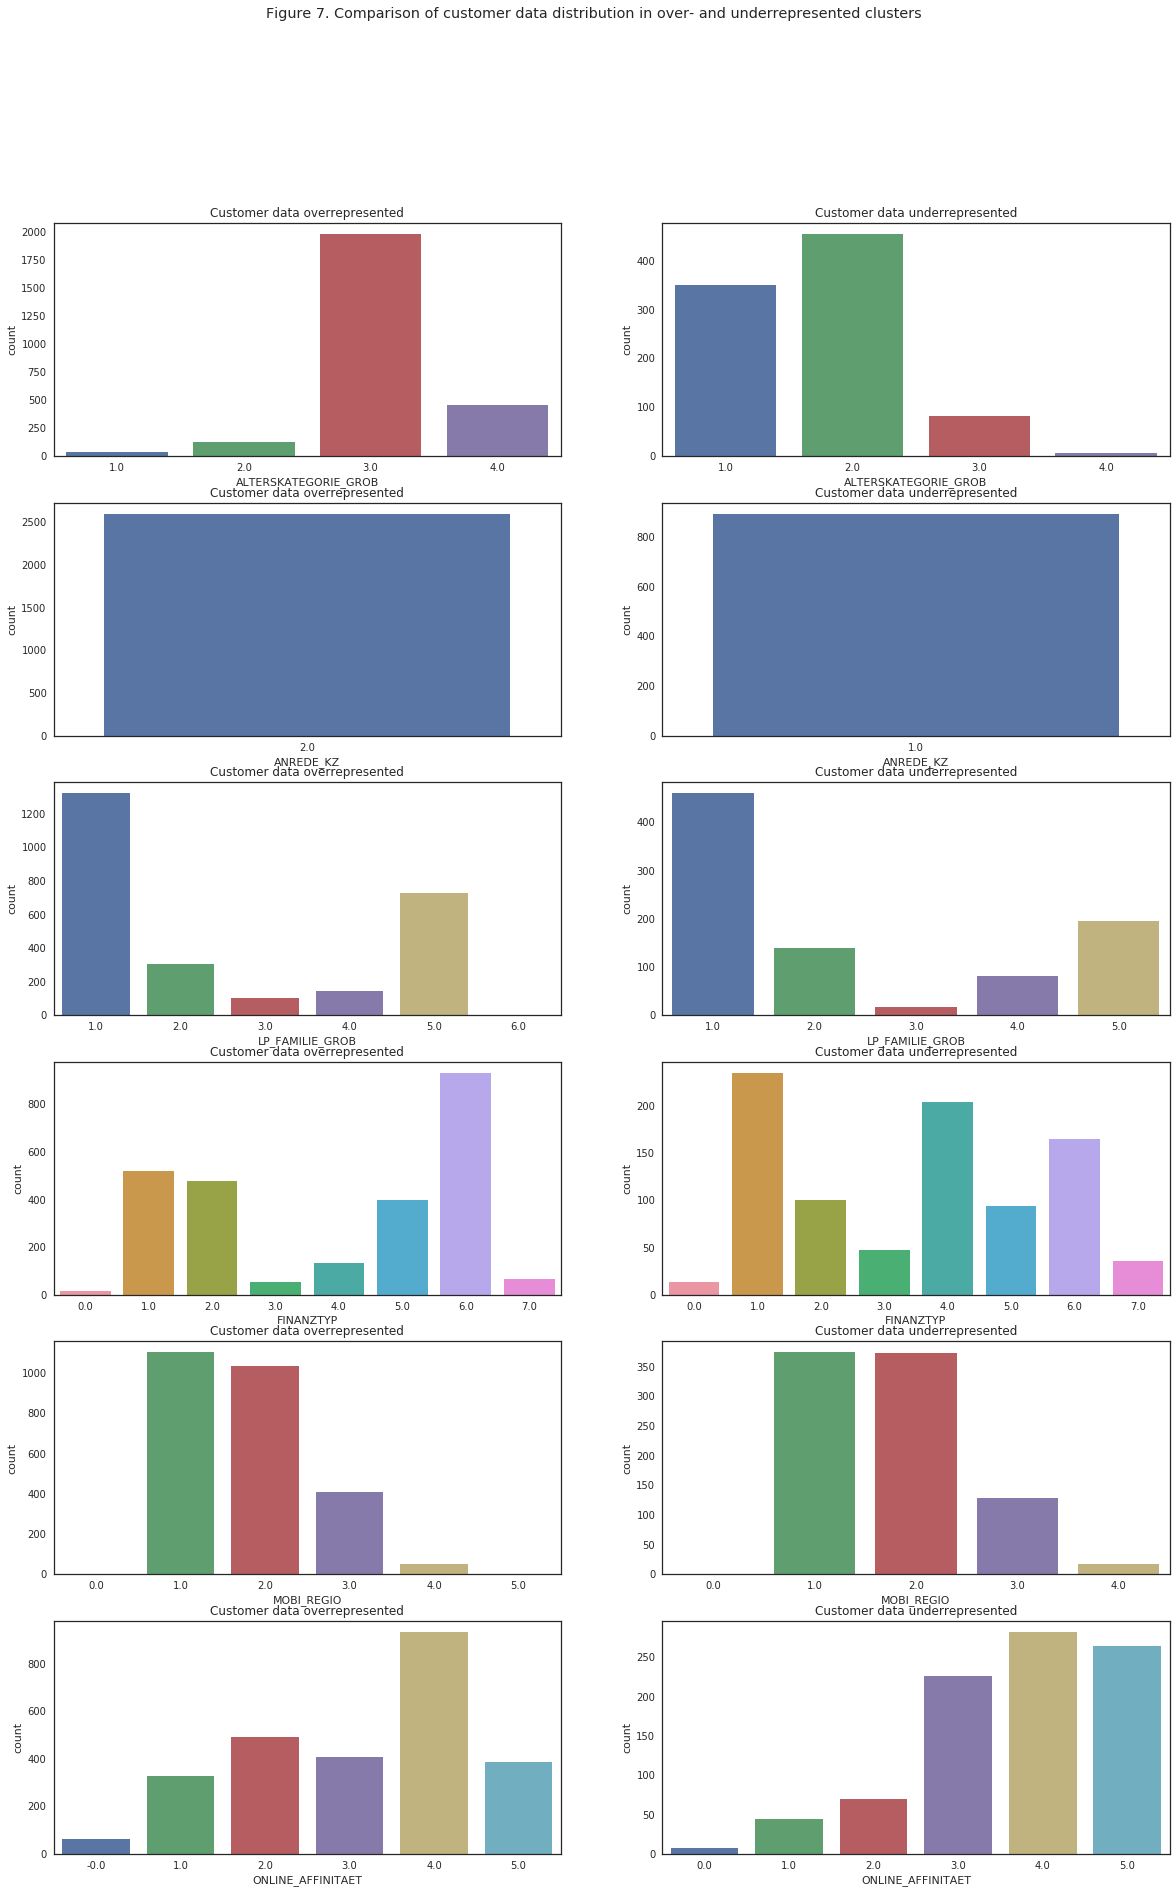

In [58]:
features_to_plot = ['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'LP_FAMILIE_GROB', 'FINANZTYP', 'MOBI_REGIO', 'ONLINE_AFFINITAET']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,30))
fig.suptitle('Figure 7. Comparison of customer data distribution in over- and underrepresented clusters')
count_of_figs =0
sns.set(style="white")
for feature in features_to_plot:
    sns.countplot(cluster_info_16[feature], ax=axes[count_of_figs,0])
    axes[count_of_figs,0].set_title('Customer data overrepresented')
    sns.countplot(cluster_info_9[feature], ax=axes[count_of_figs,1])
    axes[count_of_figs,1].set_title('Customer data underrepresented')
    count_of_figs +=1

### Review of comparing customer data to demographics data



- A comparison of overrepresented and underrepresented segments of customers was made in respect to such fields as age group, financial type, family type, gender, mobility as well as online affinity.

- The overrepresented cluster mostly contained female individuals of the middle age (46 - 60), who either live as singles or have a multi-person household. They are of a mostly wealthy financial type, ready to spend, followed by the categories of considerably lower financial interest. Representatives of this cluster travel a lot (mirrored in high and very high mobility patterns), and mostly have high online affinity.
 
- The underrepresented cluster mostly consisted of male individuals. They were predominantly of a considerably younger age (up to 45 years old) and mostly single. As to their financial type, this cluster showed more diversity in the distribution of potential financial interest with low interest and the phase of being prepared to spend slightly dominanting the other categories. Almost the same degree of mobility patterns was observed as in the overrepresented cluster. Interestingly, a much lower online affinity was recorded in this cluster. 
 
- Overall it is possible to state, that the patterns observed in different clusters, show enough trends and correlations to provide sufficient information on which groups of customers are underrepresented and to come up with a strategy of how they could be addressed in a more efficient and targeted way. 
 
